# Third year talk

Here, I will use this space to sketch out some simple concepts and create plots that might be useful for my 3rd year talk.

NOTE: Below, there are some (potential) plots for VSS 2019

In [44]:
# Just load the basic modules, data
import numpy as np
import matplotlib
matplotlib.use('TkAgg') # to avoid GUI/cluster issues...
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pltSave
import matplotlib.cm as cm
import seaborn as sns
import scipy.optimize as opt
from scipy.stats.mstats import gmean as geomean
from scipy.stats import norm
import sys # so that we can import modules in different folder
import os
import autoreload

# sys.path.insert(0, '../sfDiversity/sfDiv-OriModel/sfDiv-python/');
import helper_fcns as hf

%matplotlib inline 

curr_dir = os.getcwd();

data_loc = 'V1_orig/structures/'
expInd = 1;
save_loc = 'Reports/2020-vss/poster/figures/'

/users/plevy/.conda/envs/lcv-python/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/users/plevy/.conda/envs/lcv-python/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/users/plevy/.conda/envs/lcv-python/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/users/plevy/.conda/envs/lcv-python/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/users/plevy/.conda/envs/lcv-python/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/users/plevy/.conda/envs/lcv-py

In [32]:
plt.style.use('https://raw.githubusercontent.com/paul-levy/SF_diversity/master/paul_plt_style.mplstyle');
despn = 5;

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.style'] = 'oblique'
rcParams['font.size'] = 20;
rcParams['lines.linewidth'] = 2;
rcParams['pdf.fonttype'] = 3 # should be 42, but there are kerning issues
rcParams['ps.fonttype'] = 3 # should be 42, but there are kerning issues

sns.set_style('ticks')

In [35]:
# # load only if need (slow)
whichCell = 28;

dataList = np.load(data_loc + 'dataList.npy', encoding='latin1').item();
cellStruct = np.load(data_loc + dataList['unitName'][whichCell-1] + '_sfm.npy', encoding='latin1').item()

### Basic normalization

In [8]:
naka_rushton = lambda c, c50, n: np.divide(np.power(c, n), np.power(c, n)+np.power(c50, n))
test_cons = np.linspace(0.01, 1, 50)
naka_rushton_norm = lambda c, c50, n: np.divide(naka_rushton(c, c50, n), np.max(naka_rushton(c, c50, n)))
# test_cons = np.geomspace(0.01, 1, 50)

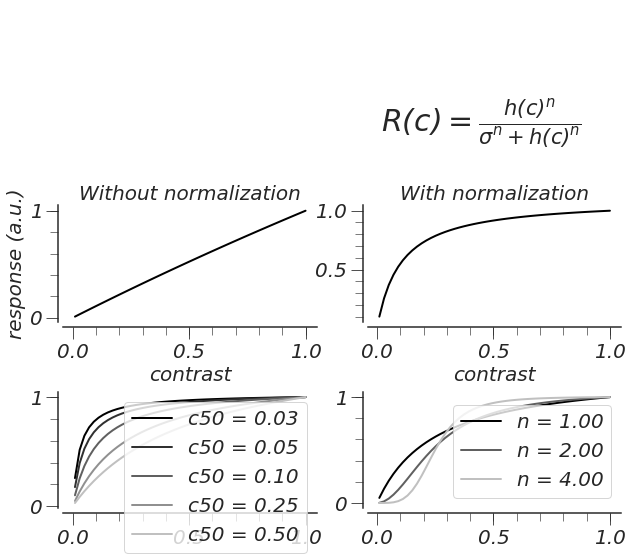

In [25]:
is_logx = 0;
spn_offset = 5;

nrow = 3;
ncol = 2;
sns.set_style('ticks')
f, ax = plt.subplots(nrow, ncol, figsize=(ncol*5, nrow*3));

plt.subplot(nrow, 1, 1);
plt.text(0.75, 0.1, r'$R(c) = \frac{h(c)^n}{{\sigma}^n + h(c)^n}$', fontsize=30, horizontalalignment='center',
         verticalalignment='center')
plt.axis('off')

plt.subplot(nrow, ncol, 3);
curr_c50 = 10; curr_n = 1;
plt.plot(test_cons, naka_rushton_norm(test_cons, curr_c50, curr_n), color='k');
plt.xlabel('contrast');
plt.ylabel('response (a.u.)');
plt.title('Without normalization')
if is_logx:
    plt.xscale('log');
sns.despine(offset=spn_offset)

plt.subplot(nrow, ncol, 4);
curr_c50 = 0.1; curr_n = 1;
plt.plot(test_cons, naka_rushton_norm(test_cons, curr_c50, curr_n), color='k');
plt.xlabel('contrast');
# plt.ylabel('response (a.u.)');
plt.title('With normalization')
if is_logx:
    plt.xscale('log');
sns.despine(offset=spn_offset)

plt.subplot(nrow, ncol, 5);
c50_set = [0.03, 0.05, 0.1, 0.25, 0.5]
grays = cm.gray(np.linspace(0, 0.75, len(c50_set)))
curr_n = 1;
for i in range(len(c50_set)):
    plt.plot(test_cons, naka_rushton_norm(test_cons, c50_set[i], curr_n), color=grays[i], label = 'c50 = %.2f' % c50_set[i]);
# plt.xlabel('contrast');
# plt.ylabel('response (a.u.)');
# plt.title('Changing the saturation point')
plt.legend();
if is_logx:
    plt.xscale('log');
sns.despine(offset=spn_offset)

plt.subplot(nrow, ncol, 6);
n_set = [1, 2, 4]
grays = cm.gray(np.linspace(0, 0.75, len(n_set)))
curr_c50 = 0.25;
for i in range(len(n_set)):
    plt.plot(test_cons, naka_rushton_norm(test_cons, curr_c50, n_set[i]), color=grays[i], label = 'n = %.2f' % n_set[i]);
# plt.xlabel('contrast');
# plt.ylabel('response (a.u.)');
# plt.title('Changing the exponent')
plt.legend();
if is_logx:
    plt.xscale('log');
sns.despine(offset=spn_offset)

f.subplots_adjust(wspace=0.2, hspace=0.6);

saveName = "/normCartoon_v1.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close()

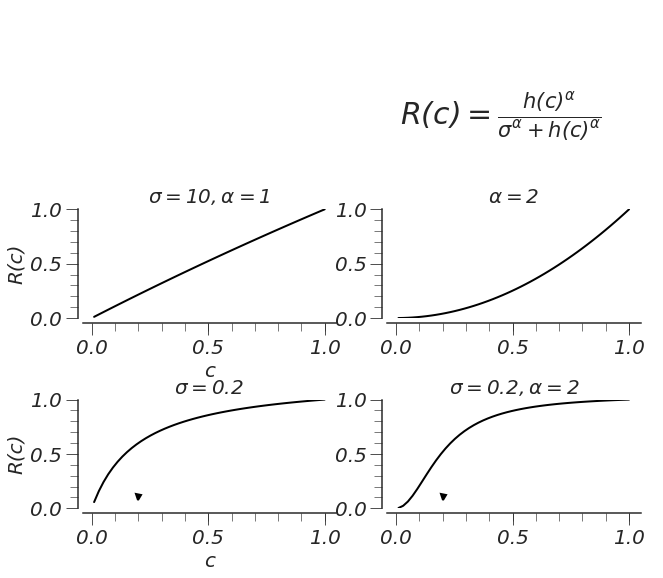

In [26]:
is_logx = 0;
spn_offset = 5;

nrow = 3;
ncol = 2;
sns.set_style('ticks')
f, ax = plt.subplots(nrow, ncol, figsize=(ncol*5, nrow*3));

plt.subplot(nrow, 1, 1);
plt.text(0.75, 0.1, r'$R(c) = \frac{h(c)^\alpha}{{\sigma}^\alpha + h(c)^\alpha}$', fontsize=30, horizontalalignment='center',
         verticalalignment='center')
plt.axis('off')

plt.subplot(nrow, ncol, 3);
curr_c50 = 10; curr_n = 1;
plt.plot(test_cons, naka_rushton_norm(test_cons, curr_c50, curr_n), color='k');
plt.xlabel('c');
plt.ylabel('R(c)');
plt.ylim([0, 1])
plt.title(r'$\sigma=10, \alpha=1$')
if is_logx:
    plt.xscale('log');
sns.despine(offset=spn_offset)

plt.subplot(nrow, ncol, 4);
curr_c50 = 10; curr_n = 2;
plt.plot(test_cons, naka_rushton_norm(test_cons, curr_c50, curr_n), color='k');
plt.title(r'$\alpha=2$')
plt.ylim([0, 1])
if is_logx:
    plt.xscale('log');
sns.despine(offset=spn_offset)

plt.subplot(nrow, ncol, 5);
curr_c50 = .2; curr_n = 1;
plt.plot(test_cons, naka_rushton_norm(test_cons, curr_c50, curr_n), color='k');
plt.plot(curr_c50, 0.1, 'v', color='k')
plt.xlabel('c');
plt.ylabel('R(c)');
plt.ylim([0, 1])
plt.title(r'$\sigma=0.2$')
# plt.title('With normalization')
if is_logx:
    plt.xscale('log');
sns.despine(offset=spn_offset)

plt.subplot(nrow, ncol, 6);
curr_c50 = .2; curr_n = 2;
plt.plot(test_cons, naka_rushton_norm(test_cons, curr_c50, curr_n), color='k');
plt.plot(curr_c50, 0.1, 'v', color='k')
plt.ylim([0, 1])
plt.title(r'$\sigma=0.2, \alpha=2$')
# plt.xlabel('c');
# plt.ylabel('R(c)');
# plt.title('With normalization')
if is_logx:
    plt.xscale('log');
sns.despine(offset=spn_offset)

f.subplots_adjust(wspace=0.2, hspace=0.75);

saveName = "/normCartoon_v2.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close()

### Spatial frequency normalization

#### Simple version:

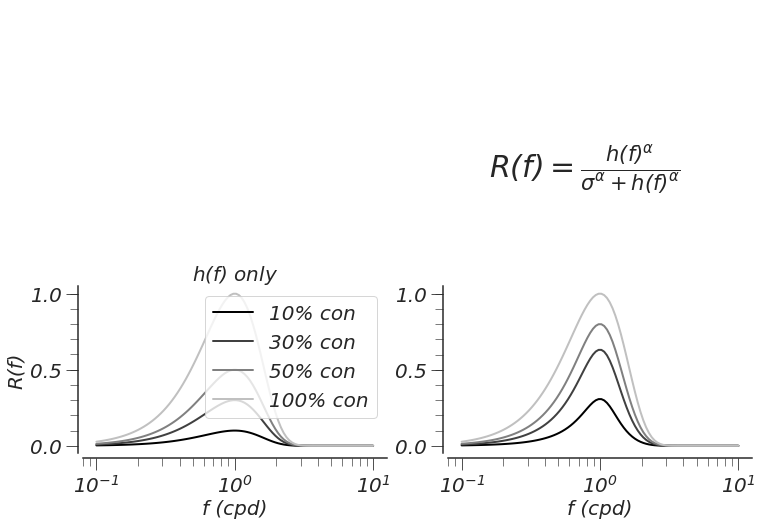

In [27]:
is_logx = 1;
spn_offset = 5;

# set V1 filter
prefSf = 1;
dOrd = 2;
nSteps = 100;
stims = np.geomspace(0.1, 10, nSteps)
filter, _ = hf.deriv_gauss([prefSf, dOrd], stimSf = stims)
# set normalization
naka_rushton = lambda c, c50, n: np.divide(np.power(c, n), np.power(c, n)+np.power(c50, n))
n = 1;
c50 = 0.25; # 0.25

nrow = 2;
ncol = 2;
sns.set_style('ticks')
f, ax = plt.subplots(nrow, ncol, figsize=(ncol*6, nrow*4));

plt.subplot(nrow, 1, 1);
plt.text(0.75, 0.1, r'$R(f) = \frac{{h(f)}^\alpha}{{\sigma}^\alpha + h(f)^\alpha}$', fontsize=30, horizontalalignment='center',
         verticalalignment='center')
plt.axis('off')

# un-normalized SF tuning
plt.subplot(nrow, ncol, 3);
cons = [0.1, 0.3, 0.5, 1];
colors = cm.gray(np.linspace(0, 0.75, len(cons)));
for c in range(len(cons)):
    plt.plot(stims, filter*cons[c], color=colors[c], label = '%.0f%% con' % (100*cons[c]));
plt.xlabel('f (cpd)');
plt.ylabel('R(f)');
plt.title(r'$h(f)$ only')
plt.legend();
if is_logx:
    plt.xscale('log');
sns.despine(offset=spn_offset)

# normalized SF tuning
plt.subplot(nrow, ncol, 4);
colors = cm.gray(np.linspace(0, 0.75, len(cons)));
mult_factor = 0.75; # at what contrast do you want the normalized curve to be the same shape as the un-norm curve?
adj_filter = np.divide(mult_factor*filter*c50, 1-mult_factor*filter);
for c in range(len(cons)):
    plt.plot(stims, np.divide(naka_rushton(adj_filter*cons[c], c50, n), 
                              max(naka_rushton(adj_filter*cons[-1], c50, n))), color=colors[c]);
plt.xlabel('f (cpd)');
# plt.ylabel('response (a.u.)');
# plt.title('With normalization')
if is_logx:
    plt.xscale('log');
sns.despine(offset=spn_offset)

f.subplots_adjust(wspace=0.2, hspace=0.6);

saveName = "/sfNormSimple.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close()

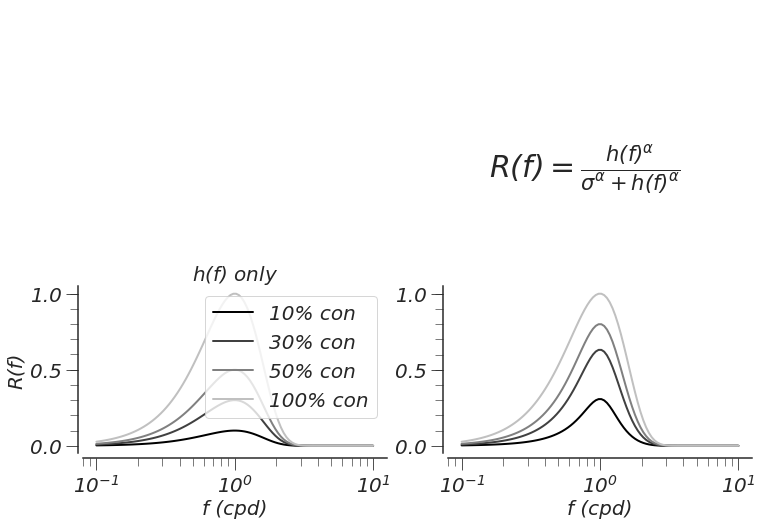

In [28]:
is_logx = 1;
spn_offset = 5;

# set V1 filter
prefSf = 1;
dOrd = 2;
nSteps = 100;
stims = np.geomspace(0.1, 10, nSteps)
filter, _ = hf.deriv_gauss([prefSf, dOrd], stimSf = stims)
# set normalization
naka_rushton = lambda c, c50, n: np.divide(np.power(c, n), np.power(c, n)+np.power(c50, n))
n = 1;
c50 = 0.25; # 0.25

nrow = 2;
ncol = 2;
sns.set_style('ticks')
f, ax = plt.subplots(nrow, ncol, figsize=(ncol*6, nrow*4));

plt.subplot(nrow, 1, 1);
plt.text(0.75, 0.1, r'$R(f) = \frac{{h(f)}^\alpha}{{\sigma}^\alpha + h(f)^\alpha}$', fontsize=30, horizontalalignment='center',
         verticalalignment='center')
plt.axis('off')

# un-normalized SF tuning
plt.subplot(nrow, ncol, 3);
cons = [0.1, 0.3, 0.5, 1];
colors = cm.gray(np.linspace(0, 0.75, len(cons)));
for c in range(len(cons)):
    plt.plot(stims, filter*cons[c], color=colors[c], label = '%.0f%% con' % (100*cons[c]));
plt.xlabel('f (cpd)');
plt.ylabel('R(f)');
plt.title(r'$h(f)$ only')
plt.legend();
if is_logx:
    plt.xscale('log');
sns.despine(offset=spn_offset)

# normalized SF tuning
plt.subplot(nrow, ncol, 4);
colors = cm.gray(np.linspace(0, 0.75, len(cons)));
mult_factor = 0.75; # at what contrast do you want the normalized curve to be the same shape as the un-norm curve?
adj_filter = np.divide(mult_factor*filter*c50, 1-mult_factor*filter);
for c in range(len(cons)):
    plt.plot(stims, np.divide(naka_rushton(adj_filter*cons[c], c50, n), 
                              max(naka_rushton(adj_filter*cons[-1], c50, n))), color=colors[c]);
plt.xlabel('f (cpd)');
# plt.ylabel('response (a.u.)');
# plt.title('With normalization')
if is_logx:
    plt.xscale('log');
sns.despine(offset=spn_offset)

# plt.subplot(nrow, ncol, 5);
# colors = cm.gray(np.linspace(0, 0.75, len(cons)));
# for c in range(len(cons)):
#     plt.plot(stims, np.divide(naka_rushton(adj_filter*cons[c], c50, n), np.max(naka_rushton(adj_filter*cons[c], c50, n))),
#              color=colors[c]);
# plt.xlabel('sf (cpd)');
# # plt.ylabel('response (a.u.)');
# # plt.title('With normalization')
# if is_logx:
#     plt.xscale('log');
# sns.despine(offset=spn_offset)

# normalized SF tuning - a check on normalization...
# plt.subplot(nrow, ncol, 5);
# colors = cm.gray(np.linspace(0, 0.75, len(cons)));
# for c in range(len(cons)):
#     plt.plot(stims, np.divide(naka_rushton(filter*cons[c], c50, n), np.max(naka_rushton(filter*cons[c], c50, n))),
#              color=colors[c]);
# plt.xlabel('sf (cpd)');
# # plt.ylabel('response (a.u.)');
# plt.title('With normalization')
# if is_logx:
#     plt.xscale('log');
# sns.despine(offset=spn_offset)

f.subplots_adjust(wspace=0.2, hspace=0.6);

saveName = "/sfNormSimple.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close()

In [39]:
omega = np.logspace(-2, 2, 1000); # frequencies to test
# Compute suppressive SF tuning                                                                                                                                                                                                                                           
# The exponents of the filters used to approximately tile the spatial frequency domain                                                                                                                                                                                    
n = np.array([.75, 1.5]);
# The number of cells in the broad/narrow pool                                                                                                                                                                                                                            
nUnits = np.array([12, 15]);
# The gain of the linear filters in the broad/narrow pool                                                                                                                                                                                                                 
gain = np.array([.57, .614]);

normPool = {'n': n, 'nUnits': nUnits, 'gain': gain};
# Get filter properties in spatial frequency domain                                                                                                                                                                                                                       
gain = np.empty((len(normPool.get('n'))));
for iB in range(len(normPool.get('n'))):
    prefSf_new = np.logspace(np.log10(.1), np.log10(30), normPool.get('nUnits')[iB]);
    if iB == 0:
        prefSf = prefSf_new;
    else:
        prefSf = [prefSf, prefSf_new];
    gain[iB]   = normPool.get('gain')[iB];

In [40]:
for iB in range(len(normPool.get('n'))):
    sfRel = np.matlib.repmat(omega, len(prefSf[iB]), 1).transpose() / prefSf[iB]
    s     = np.power(np.matlib.repmat(omega, len(prefSf[iB]), 1).transpose(), normPool['n'][iB]) \
                * np.exp(-normPool['n'][iB]/2 * np.square(sfRel));
    sMax  = np.power(prefSf[iB], normPool['n'][iB]) * np.exp(-normPool['n'][iB]/2);
    if iB == 0:
        selSf = gain[iB] * s / sMax;
    else:
        selSf = [selSf, gain[iB] * s/sMax];

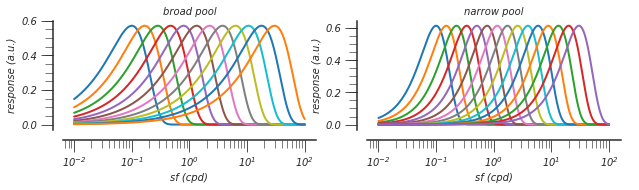

In [41]:
# plot broad/narrow pools
sns.set_style('ticks')
pool_name = ['broad', 'narrow']
f, ax = plt.subplots(1, 2, figsize=(10, 2))
for i in range(2):
    for j in range(selSf[i].shape[1]):
        ax[i].semilogx(omega, selSf[i][:, j])
        ax[i].set_title('%s pool' % pool_name[i])
        ax[i].set_xlabel('sf (cpd)');
        ax[i].set_ylabel('response (a.u.)')
sns.despine(offset=10)

In [42]:
# get normalization tuning
normPool = cellStruct['sfm']['mod']['normalization']
normPref = normPool['pref']['sf'];
inhSfTuning = hf.getSuppressiveSFtuning(); # 1000 x 27 (27=12+15, #filters per pool)...

gs_mean = 0;
# gs_std = 10;
nInhChan = 2;
nTrials = inhSfTuning.shape[0];

TypeError: genNormWeights() missing 1 required positional argument: 'expInd'

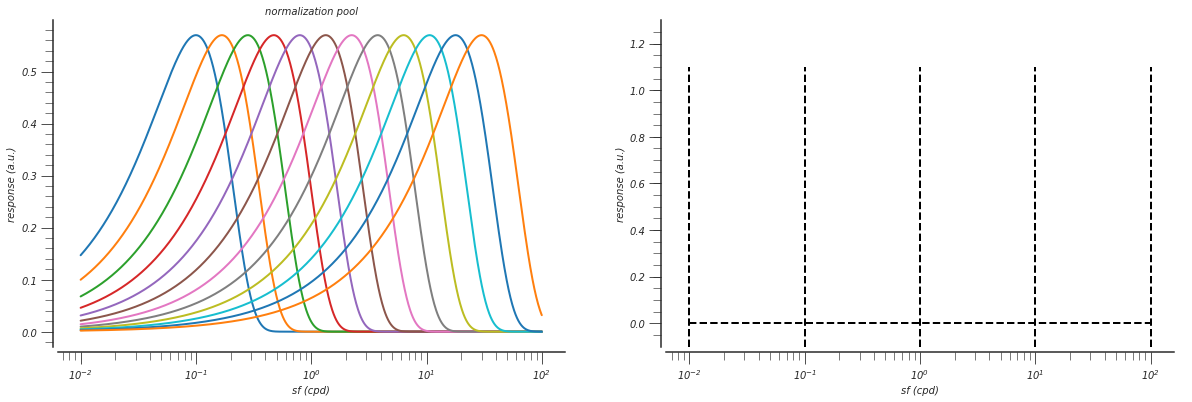

In [43]:
# weighting the pool
sns.set_style('ticks')
pool_name = ['broad', 'narrow']
f, ax = plt.subplots(1, 2, figsize=(20, 6))

for j in range(selSf[0].shape[1]):
    ax[0].semilogx(omega, selSf[0][:, j])
    ax[0].set_title('normalization pool')
    ax[0].set_xlabel('sf (cpd)');
    ax[0].set_ylabel('response (a.u.)')
sns.despine(offset=despn)

plt.subplot(1, 2, 2);
omega = np.logspace(-2, 2, 1000);
plt.semilogx([omega[0], omega[-1]], [0, 0], 'k--')
plt.semilogx([.01, .01], [-0.1, 1.1], 'k--')
plt.semilogx([.1, .1], [-0.1, 1.1], 'k--')
plt.semilogx([1, 1], [-0.1, 1.1], 'k--')
plt.semilogx([10, 10], [-0.1, 1.1], 'k--')
plt.semilogx([100, 100], [-0.1, 1.1], 'k--')
plt.ylim(-0.1, 1.3)
plt.xlabel('sf (cpd)');
plt.ylabel('response (a.u.)')
sns.despine(offset=despn)

std_set = [0.1, 1, 2, 4, 16]
colors = cm.gray(np.linspace(0, 0.85, len(std_set)));
for i in range(len(std_set)):
    normWeights = hf.genNormWeights(cellStruct, nInhChan, gs_mean, std_set[i], 1000, expInd=expInd) 
    normWeights = normWeights[:, :, 0]; # each 3rd dim slice is the same, just take one

    sfNormCurr = np.sum(.5*(normWeights*np.square(inhSfTuning)), 1);
    sfNormTune = sfNormCurr/np.amax(np.abs(sfNormCurr));

    tn = plt.semilogx(omega, sfNormTune, '-', linewidth=2, color=colors[i], label=r'$\sigma=%.1f$' % std_set[i]);
plt.legend();
plt.title('Tuned normalization');

saveName = "/tunedNorm.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();

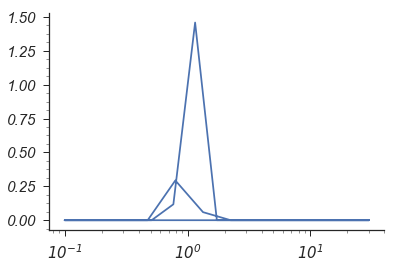

In [91]:
# to show weights over filter
normWeights = hf.genNormWeights(cellStruct, nInhChan, gs_mean, std_set[0], 1000) 
to_plot = [x[0] for x in normWeights[0]]
norm_prefz = np.hstack((normPref[0], normPref[1]))
plt.semilogx(norm_prefz, to_plot);

ValueError: operands could not be broadcast together with shapes (100,27) (1000,27) 

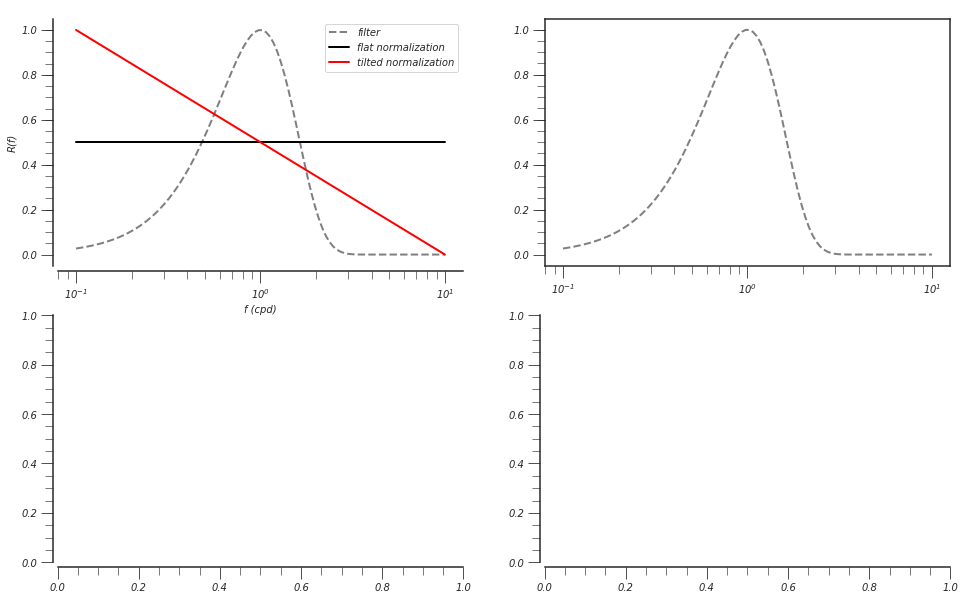

In [46]:
# filter properties / evaluation
prefSf = 1;
dOrd = 2;
nSteps = 100;
stims = np.geomspace(0.1, 10, nSteps)
# plot properties
nrow = 2;
ncol = 2;
f, ax = plt.subplots(nrow, ncol, figsize=(8*ncol, 5*nrow))

ax[0, 0].axis('off')
ax[0, 1].axis('off')

# plot filter with normalization - show exc. filter, flat normalization, something not flat!
plt.subplot(nrow, ncol, 1)
prefSf = 1;
dOrd = 2;
nSteps = 100;
stims = np.geomspace(0.1, 10, nSteps)
excFilter, _ = hf.deriv_gauss([prefSf, dOrd], stimSf = stims)
plt.semilogx(stims, excFilter, linestyle='--', color='k', alpha=0.5, label='filter')
plt.semilogx(stims, 0.5*np.ones_like(excFilter), linestyle='-', color='k', label='flat normalization')
plt.semilogx(stims, np.linspace(1, 0, len(stims)), linestyle='-', color='r', label='tilted normalization')
plt.xlabel('f (cpd)');
plt.ylabel('R(f)');
plt.legend();
# plt.title(r'shift $g(f)$')
sns.despine(offset=despn);

# plot filter with normalization - show exc. filter, flat normalization, something not flat!
plt.subplot(nrow, ncol, 2)
prefSf = 1;
dOrd = 2;
nSteps = 100;
stims = np.geomspace(0.1, 10, nSteps)
excFilter, _ = hf.deriv_gauss([prefSf, dOrd], stimSf = stims)
plt.semilogx(stims, excFilter, linestyle='--', color='k', alpha=0.5, label='filter')
# first normalization signal
gs_mean = 0;
gs_std = 5;
normWeights = hf.genNormWeights(cellStruct, nInhChan, gs_mean, gs_std, nSteps, expInd=expInd) 
normWeights = normWeights[:, :, 0]; # each 3rd dim slice is the same, just take one
sfNormCurr = np.sum(.5*(normWeights*np.square(inhSfTuning)), 1);
sfNormTune = sfNormCurr/np.amax(np.abs(sfNormCurr));
plt.semilogx(stims, sfNormTune, linestyle='-', color='k', label='broad normalization')
# second normalization signal
gs_mean=-0.5;
gs_std = 0.5;
normWeights = hf.genNormWeights(cellStruct, nInhChan, gs_mean, gs_std, nSteps, expInd=expInd) 
normWeights = normWeights[:, :, 0]; # each 3rd dim slice is the same, just take one
sfNormCurr = np.sum(.5*(normWeights*np.square(inhSfTuning)), 1);
sfNormTune = sfNormCurr/np.amax(np.abs(sfNormCurr));
plt.semilogx(stims, sfNormTune, linestyle='-', color='r', label='shifted normalization')
# labels, etc
# plt.xlabel('f (cpd)');
# plt.ylabel('R(f)');
plt.legend();
# plt.title(r'shift $g(f)$')
sns.despine(offset=despn);

## Now, for the real normalization
# norm properties
gs_mean = 0; # in log space
gs_std = 1; # in log space
nInhChan = 2;
nTrials = inhSfTuning.shape[0];
inhSfTuning = hf.getSuppressiveSFtuning(stims);

# plot filter with normalization - adjust mean
plt.subplot(nrow, ncol, 3)
mu_set = [-1, 0, 1]
colors = cm.gray(np.linspace(0.85, 0, len(std_set)));
for i in range(len(mu_set)):
    normWeights = hf.genNormWeights(cellStruct, nInhChan, mu_set[i], gs_std, nSteps, expInd=expInd) 
    normWeights = normWeights[:, :, 0]; # each 3rd dim slice is the same, just take one

    sfNormCurr = np.sum(.5*(normWeights*np.square(inhSfTuning)), 1);
    sfNormTune = sfNormCurr/np.amax(np.abs(sfNormCurr));

    resp = np.divide(filter, sfNormTune)
    
    tn = plt.semilogx(stims, resp/np.max(resp), '-', linewidth=2, color=colors[i], label=r'$\mu=%.1f$' % mu_set[i]);
plt.xlabel('f (cpd)');
plt.ylabel('R(f)');
plt.legend();
plt.title(r'shift $g(f)$')
sns.despine(offset=despn);

# plot filter with normalization - adjust normalization constant
plt.subplot(nrow, ncol, 4)
gs_mean = 1;
gs_std = 1;
colors = cm.gray(np.linspace(0, 0.85, len(std_set)));
# compute norm. signal
normWeights = hf.genNormWeights(cellStruct, nInhChan, gs_mean, gs_std, nSteps) 
normWeights = normWeights[:, :, 0]; # each 3rd dim slice is the same, just take one
sfNormCurr = np.sum(.5*(normWeights*np.square(inhSfTuning)), 1);
sfNormTune = sfNormCurr/np.amax(np.abs(sfNormCurr));

const_set = [0, 0.25, 3]
for i in range(len(const_set)):
    resp = np.divide(filter, const_set[i] + sfNormTune)
    
    tn = plt.semilogx(stims, resp/np.max(resp), '-', linewidth=2, color=colors[i], label=r'$+=%.1f$' % const_set[i]);
plt.legend();
plt.title(r'adjust ${\sigma}$')
sns.despine(offset=despn);

f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.8);
f.suptitle(r'$R(\omega) = \frac{{h(\omega)}^2}{{\sigma}^2 + g(\omega)^2}$', fontsize=40);

saveName = "/sfNorm.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();

In [47]:
from matplotlib.ticker import FormatStrFormatter

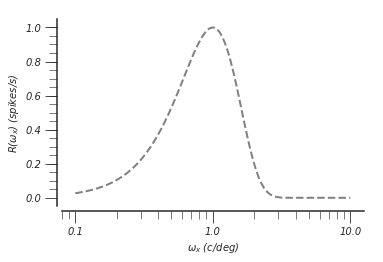

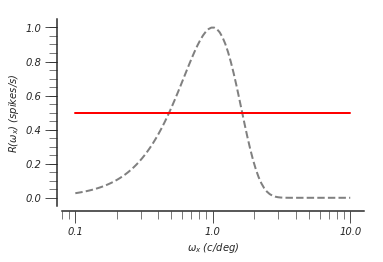

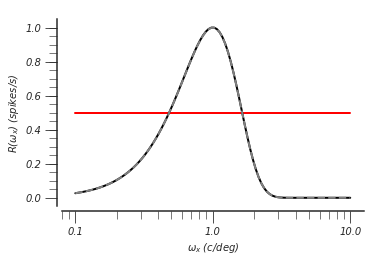

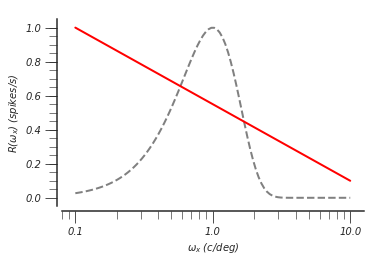

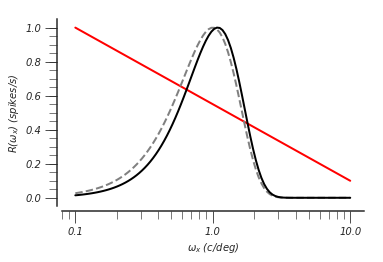

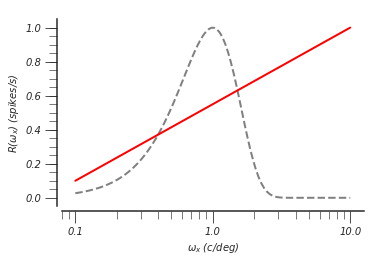

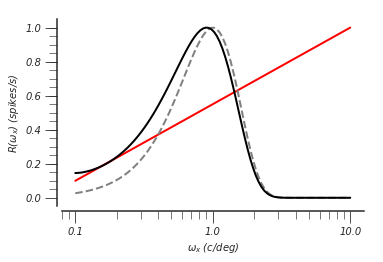

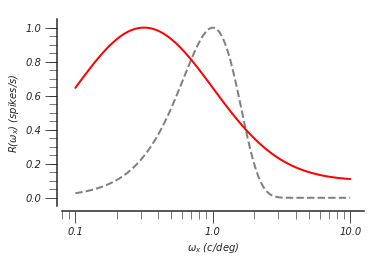

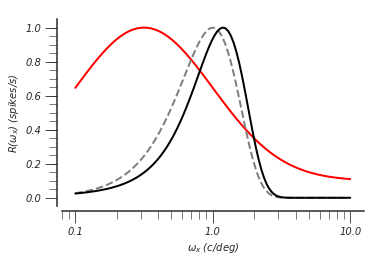

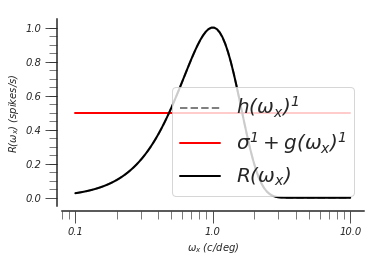

In [48]:
# filter properties / evaluation
prefSf = 1;
dOrd = 2;
nSteps = 100;
stims = np.geomspace(0.1, 10, nSteps)
fontsz = 20;
alpha = 1;

### FLAT NORMALIZATION CASE
# plot exc. filter alone
f, ax = plt.subplots(1, 1)
excFilter, _ = np.power(hf.deriv_gauss([prefSf, dOrd], stimSf = stims), alpha);
plt.semilogx(stims, excFilter, linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
# plt.legend(fontsize=fontsz, loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title(r'shift $g(f)$')
sns.despine(offset=despn);
f.subplots_adjust(top=0.9, left=0.2, bottom=0.25);
# save
saveName = "/sfNorm-1.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();

# plot exc filter, norm. filter
f, ax = plt.subplots(1, 1)
sigma = 0.1;
flatNorm  = np.power(0.4 * np.ones_like(excFilter), alpha);
plt.semilogx(stims, excFilter, linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)
plt.semilogx(stims, sigma + flatNorm, linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
# plt.legend(fontsize=fontsz);
# plt.title(r'shift $g(f)$')
sns.despine(offset=despn);
f.subplots_adjust(top=0.9, left=0.2, bottom=0.25);
# save
saveName = "/sfNorm-2.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();

# plot exc filter, full response, norm filter
f, ax = plt.subplots(1, 1)
plt.semilogx(stims, sigma + flatNorm, linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
resp = np.divide(excFilter, sigma + flatNorm);
plt.semilogx(stims, np.divide(resp, np.max(resp)), linestyle='-', color='k', label=r'$R(\omega)$')
plt.semilogx(stims, excFilter, linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);
#
saveName = "/sfNorm-3.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();


### NEGATIVE TILT NORMALIZATION CASE
# plot exc filter, norm. filter
f, ax = plt.subplots(1, 1)
excFilter, _ = np.power(hf.deriv_gauss([prefSf, dOrd], stimSf = stims), alpha)
sigma = 0.1;
tiltNorm  = np.power(np.linspace(1-sigma, 0, len(excFilter)), alpha)
plt.semilogx(stims, excFilter, linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)
plt.semilogx(stims, sigma + tiltNorm, linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);
#
saveName = "/sfNorm-4.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();

# plot exc filter, full response, and norm filter
f, ax = plt.subplots(1, 1)
sigma = 0.1;
plt.semilogx(stims, sigma + tiltNorm, linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
plt.semilogx(stims, excFilter, linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)
resp = np.divide(excFilter, sigma+tiltNorm);
plt.semilogx(stims, np.divide(resp, np.max(resp)), linestyle='-', color='k', label=r'$R(\omega)$')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);
#
saveName = "/sfNorm-5.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();

### POSITIVE TILT NORMALIZATION CASE
# plot exc filter, norm. filter
f, ax = plt.subplots(1, 1)
excFilter, _ = np.power(hf.deriv_gauss([prefSf, dOrd], stimSf = stims), alpha)
sigma = 0.1
tiltNorm  = np.power(np.linspace(0, 1-sigma, len(excFilter)), alpha);
plt.semilogx(stims, excFilter, linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)
plt.semilogx(stims, sigma + tiltNorm, linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);
#
saveName = "/sfNorm-6.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();

# plot exc filter, full response, and norm. filter
f, ax = plt.subplots(1, 1)
sigma = 0.1;
plt.semilogx(stims, sigma + tiltNorm, linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
plt.semilogx(stims, excFilter, linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)
resp = np.divide(excFilter, sigma+tiltNorm);
plt.semilogx(stims, np.divide(resp, np.max(resp)), linestyle='-', color='k', label=r'$R(\omega)$')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);
#
saveName = "/sfNorm-7.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();


### Log-gaussian CASE
# plot exc filter, norm. filter
f, ax = plt.subplots(1, 1)
excFilter, _ = np.power(hf.deriv_gauss([prefSf, dOrd], stimSf = stims), alpha)
sigma = 0.1;
log_sfs = np.log10(stims);
gaussWeight = norm.pdf(log_sfs, -0.5, 0.5);
gaussNorm  = (1-sigma) * np.power(np.divide(gaussWeight, np.max(gaussWeight)), alpha);
plt.semilogx(stims, excFilter, linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)
plt.semilogx(stims, sigma + gaussNorm, linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);
#
saveName = "/sfNorm-8.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();

# plot exc filter, full response, norm. filter
f, ax = plt.subplots(1, 1)
plt.semilogx(stims, sigma + gaussNorm, linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
plt.semilogx(stims, excFilter, linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)
resp = np.divide(excFilter, sigma+gaussNorm);
plt.semilogx(stims, np.divide(resp, np.max(resp)), linestyle='-', color='k', label=r'$R(\omega)$')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);
#
saveName = "/sfNorm-9.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();

### Just for legend
# plot exc filter, norm. filter, response R(w)
f, ax = plt.subplots(1, 1)
flatNorm  = np.power(0.4 * np.ones_like(excFilter), alpha)
plt.semilogx(stims, excFilter, linestyle='--', color='gray', label=r'$h(\omega_x)^%d$' % alpha)
plt.semilogx(stims, sigma + flatNorm, linestyle='-', color='r', label=r'$\sigma^%d + g(\omega_x)^%d$' % (alpha, alpha))
resp = np.divide(excFilter, sigma+flatNorm)
plt.semilogx(stims, np.divide(resp, np.max(resp)), linestyle='-', color='k', label=r'$R(\omega_x)$')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
plt.legend(fontsize=fontsz);
# plt.title(r'shift $g(f)$')
sns.despine(offset=despn);
f.subplots_adjust(top=0.9, left=0.2, bottom=0.25);
# save
saveName = "/sfNorm-forLegend.pdf"
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();



# VSS?

In [5]:
from matplotlib.ticker import FormatStrFormatter

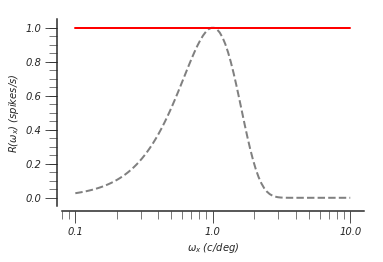

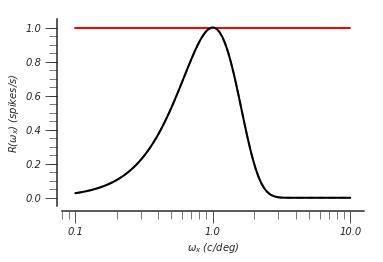

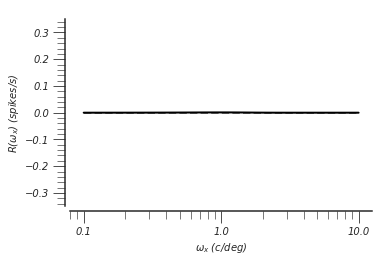

In [49]:
# filter properties / evaluation
prefSf = 1;
dOrd = 2;
nSteps = 100;
stims = np.geomspace(0.1, 10, nSteps)
fontsz = 20;
alpha = 1;

sigma = 1.00;
sigOut = sigma*100

### Log-gaussian CASE
# plot exc filter, norm. filter
f, ax = plt.subplots(1, 1)
excFilter, _ = np.power(hf.deriv_gauss([prefSf, dOrd], stimSf = stims), alpha)
log_sfs = np.log10(stims);
gaussWeight = norm.pdf(log_sfs, -0.5, 0.5);
gaussNorm  = (1-sigma) * np.power(np.divide(gaussWeight, np.max(gaussWeight)), alpha);
plt.semilogx(stims, excFilter, linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)
plt.semilogx(stims, sigma + gaussNorm, linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);
#
saveName = "/sfNorm-sig%03d.pdf" % sigOut
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();

# plot exc filter, full response, norm. filter
f, ax = plt.subplots(1, 1)
plt.semilogx(stims, sigma + gaussNorm, linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
plt.semilogx(stims, excFilter, linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)
resp = np.divide(excFilter, sigma+gaussNorm);
plt.semilogx(stims, np.divide(resp, np.max(resp)), linestyle='-', color='k', label=r'$R(\omega)$')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);

### now save
saveName = "/sfNormFull-sig%03d.pdf" % sigOut
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();

# plot overall response, but as difference
f, ax = plt.subplots(1, 1)
refCurve = excFilter;
# plt.semilogx(stims, sigma + gaussNorm, linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
plt.semilogx(stims, excFilter-refCurve, linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)
resp = np.divide(excFilter, sigma+gaussNorm);
plt.semilogx(stims, np.divide(resp, np.max(resp)) - refCurve, linestyle='-', color='k', label=r'$R(\omega)$')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylim([-0.35, 0.35])
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);

### now save
saveName = "/sfNormFullDiff-sig%03d.pdf" % sigOut
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();


### VSS 2020 - take 1

In [152]:
save_loc = save_loc.replace('Cartoon_unNorm/', 'Cartoon_unOrthodox/')

In [153]:
save_loc

'Reports/2020-vss/poster/figures/sfNormCartoon_unOrthodox/'

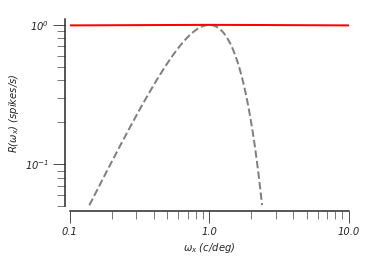

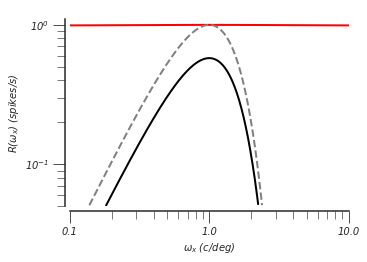

In [172]:
# filter properties / evaluation
prefSf = 1;
prefSfNormPool = 0;
dOrd = 2;
nSteps = 500;
stims = np.geomspace(0.1, 10, nSteps)
fontsz = 20;
alpha = 1;

sigma = 0.99;

minY = 0.05; 

### REFERENCE curve
sigmaRef = 0.01;
excFilter, _ = np.power(hf.deriv_gauss([prefSf, dOrd], stimSf = stims), alpha)
log_sfs = np.log10(stims);
gaussWeight = norm.pdf(log_sfs, prefSfNormPool, 0.5);
# gaussWeight = norm.pdf(log_sfs, -0.5, 0.5);
gaussWeightRef = np.max(gaussWeight);
gaussNorm  = (1-sigmaRef) * np.power(np.divide(gaussWeight, gaussWeightRef), alpha);
# gaussNorm  = sigma + np.power(np.divide(gaussWeight, gaussWeightRef), alpha);
fullNorm = sigmaRef + gaussNorm;
respRef = np.divide(excFilter, fullNorm)
###

### Log-gaussian CASE
# plot exc filter, norm. filter
f, ax = plt.subplots(1, 1)
excFilter, _ = np.power(hf.deriv_gauss([prefSf, dOrd], stimSf = stims), alpha)
log_sfs = np.log10(stims);
gaussWeight = norm.pdf(log_sfs, prefSfNormPool, 0.5);
# gaussWeight = norm.pdf(log_sfs, -0.5, 0.5);
gaussNorm  = (1-sigma) * np.power(np.divide(gaussWeight, gaussWeightRef), alpha);
# gaussNorm  = sigma + np.power(np.divide(gaussWeight, gaussWeightRef), alpha);
# pltNorm = gaussNorm;
fullNorm = sigma + gaussNorm;

excAbv = np.where(excFilter>minY);
plt.loglog(stims[excAbv], excFilter[excAbv], linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)

normAbv = np.where(fullNorm>minY);
plt.loglog(stims[normAbv], fullNorm[normAbv], linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_aspect('equal')
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
plt.xlim([0.1, 10])
plt.ylim([minY, 1.1])
# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);
#
saveName = "/sfNormLog_sig%03d.pdf" % (sigma*1000)
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();

# plot exc filter, full response, norm. filter
f, ax = plt.subplots(1, 1)
plt.loglog(stims[normAbv], fullNorm[normAbv], linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
plt.loglog(stims[excAbv], excFilter[excAbv], linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)

respOg = np.divide(excFilter, sigma+gaussNorm);
resp = np.divide(respOg, np.max(respRef))
# respNorm = np.divide(resp, np.max(resp))
respAbv = np.where(resp>minY);

plt.semilogx(stims[respAbv], resp[respAbv], linestyle='-', color='k', label=r'$R(\omega)$')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_aspect('equal')
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
plt.xlim([0.1, 10])
plt.ylim([minY, 1.1])

# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);
#
saveName = "/sfNormLog_sig%03d_all.pdf" % (sigma*1000)
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();






### VSS2020 - actually used!

In [ ]:
# filter properties / evaluation
prefSf = 3;
prefSfNormPool = +0.35;
stdSfNormPool = 0.5;
dOrd = 2;
nSteps = 500;
stims = np.geomspace(0.1, 10, nSteps)
fontsz = 20;
alpha = 2;

sigma = 0.05;
effCon = 0.35;

minY = 0.01; 
minX = 0.3;

### REFERENCE curve
refCon = 1;
# excFilterRef, _ = np.subtract(np.power(np.multiply(refCon, hf.deriv_gauss([prefSf, dOrd], stimSf = stims)), alpha), np.power(sigma, alpha))
excFilterRef, _ = np.power(np.multiply(refCon, hf.deriv_gauss([prefSf, dOrd], stimSf = stims)), alpha)
log_sfs = np.log10(stims);
gaussWeight = norm.pdf(log_sfs, prefSfNormPool, stdSfNormPool);
gaussWeightRef = np.max(gaussWeight);
gaussNormRef  = np.power((refCon-sigma) * np.divide(gaussWeight, gaussWeightRef), alpha);
# gaussNorm  = sigma + np.power(np.divide(gaussWeight, gaussWeightRef), alpha);
fullNormRef = sigma + gaussNormRef;
respRef = np.divide(excFilterRef, fullNormRef)
###

### Log-gaussian CASE
# plot exc filter, norm. filter
# excFilter, _ = np.subtract(np.power(np.multiply(effCon, hf.deriv_gauss([prefSf, dOrd], stimSf = stims)), alpha), np.power(sigma, alpha))
excFilter, _ = np.power(np.multiply(effCon, hf.deriv_gauss([prefSf, dOrd], stimSf = stims)), alpha)
log_sfs = np.log10(stims);
gaussWeight = norm.pdf(log_sfs, prefSfNormPool, stdSfNormPool);
gaussNorm  = np.power((effCon-sigma) * np.divide(gaussWeight, np.max(gaussWeight)), alpha);
# gaussNorm  = (effCon-sigma) * np.power(np.divide(gaussWeight, np.max(gaussWeight)), alpha);
fullNorm = sigma + gaussNorm;

excAbv = np.where(excFilter>minY);
normAbv = np.where(fullNorm>minY);


# plot exc filter, full response, norm. filter
f, ax = plt.subplots(1, 1)
plt.loglog(stims[normAbv], fullNorm[normAbv], linestyle='-', color='r', label=r'$\sigma^%d + g(\omega)^%d$' % (alpha, alpha))
plt.loglog(stims[excAbv], excFilter[excAbv], linestyle='--', color='gray', label=r'$f(\omega)^%d$' % alpha)

respOg = np.divide(excFilter, fullNorm);
resp = np.divide(respOg, np.max(respRef))
respAbv = np.where(resp>minY);

plt.semilogx(stims[respAbv], resp[respAbv], linestyle='-', color='k', label=r'$R(\omega)$')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_aspect('equal')
plt.xlabel(r'$\omega_x$ (c/deg)');
plt.ylabel(r'$R(\omega_x$) (spikes/s)');
plt.xlim([minX, 10])
plt.ylim([minY, 1.1])

# plt.legend(fontsize=fontsz);
sns.despine(offset=despn);
f.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9, left=0.2, bottom=0.25);
#
saveName = "/sfNormLog_con%03d_all.pdf" % (effCon*100)
full_save = os.path.dirname(save_loc);
if not os.path.exists(full_save):
    os.makedirs(full_save)
pdfSv = pltSave.PdfPages(full_save + saveName);
pdfSv.savefig(f) # only one figure here...
pdfSv.close();




